In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
sns.set_style("whitegrid")
import altair as alt
alt.renderers.enable("notebook")
import warnings
warnings.filterwarnings("ignore")

In [19]:
df = pd.read_csv('/Users/ankushbharadwaj/Desktop/News_data.csv',encoding='utf-8', sep=';')

In [20]:
df.head()

,File_Name,Content,Category,Complete_Filname
0,001.txt,Ad sales boost Time Warner profit\n\nQuarterly...,business,001.txt-business
1,002.txt,Dollar gains on Greenspan speech\n\nThe dollar...,business,002.txt-business
2,003.txt,Yukos unit buyer faces loan claim\n\nThe owner...,business,003.txt-business
3,004.txt,High fuel prices hit BA's profits\n\nBritish A...,business,004.txt-business
4,005.txt,Pernod takeover talk lifts Domecq\n\nShares in...,business,005.txt-business


In [21]:
df.describe()

,File_Name,Content,Category,Complete_Filname
count,2226,2226,2226,2226
unique,512,2128,6,2226
top,061.txt,Savvy searchers fail to spot ads\n\nInternet s...,sport,270.txt-tech
freq,5,2,511,1


In [23]:
df['Category'].value_counts()

sport            511
business         510
politics         417
tech             401
entertainment    386
README.TXT         1
Name: Category, dtype: int64

In [28]:
df1 = df.set_index('Category')
df1 = df1.drop("README.TXT", axis=0)
df1 = df1.reset_index()

In [29]:
df1['Category'].value_counts()

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: Category, dtype: int64

In [31]:
df = df1
df['Category'].value_counts()

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: Category, dtype: int64

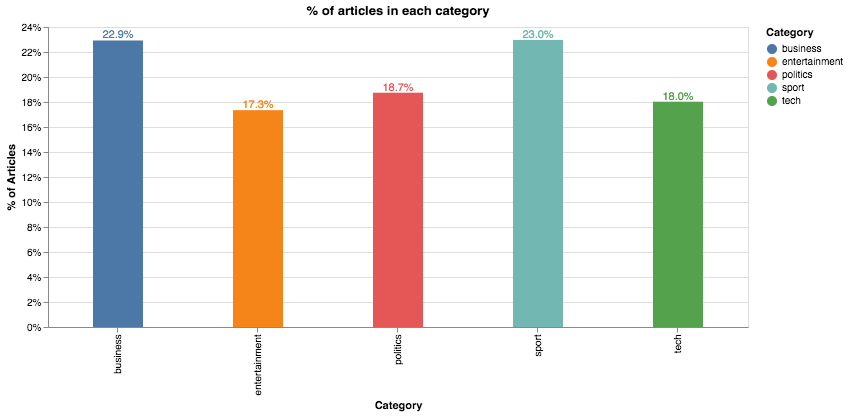

In [32]:
df['id'] = 1
df2 = pd.DataFrame(df.groupby('Category').count()['id']).reset_index()

bars = alt.Chart(df2).mark_bar(size=50).encode(
    x=alt.X('Category'),
    y=alt.Y('PercentOfTotal:Q', axis=alt.Axis(format='.0%', title='% of Articles')),
    color='Category'
).transform_window(
    TotalArticles='sum(id)',
    frame=[None, None]
).transform_calculate(
    PercentOfTotal="datum.id / datum.TotalArticles"
)

text = bars.mark_text(
    align='center',
    baseline='bottom',
    #dx=5  # Nudges text to right so it doesn't appear on top of the bar
).encode(
    text=alt.Text('PercentOfTotal:Q', format='.1%')
)

(bars + text).interactive().properties(
    height=300, 
    width=700,
    title = "% of articles in each category",
)

In [33]:
df['News_length'] = df['Content'].str.len()

Text(0.5, 1.0, 'News length distribution')

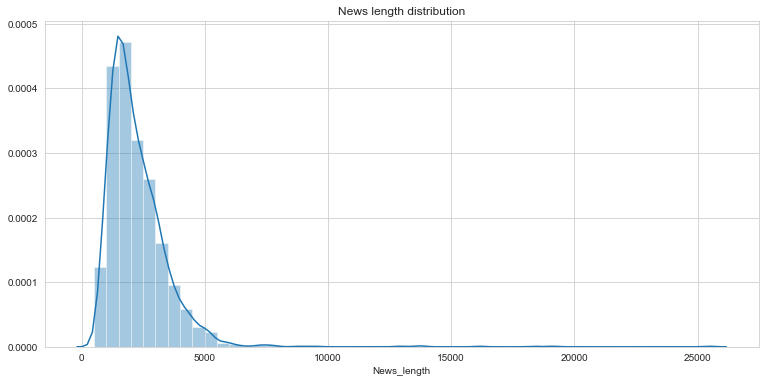

In [34]:
plt.figure(figsize=(12.8,6))
sns.distplot(df['News_length']).set_title('News length distribution')

In [35]:
df['News_length'].describe()

count     2225.000000
mean      2264.160449
std       1364.094764
min        502.000000
25%       1447.000000
50%       1966.000000
75%       2803.000000
max      25484.000000
Name: News_length, dtype: float64

Text(0.5, 1.0, 'News length distribution')

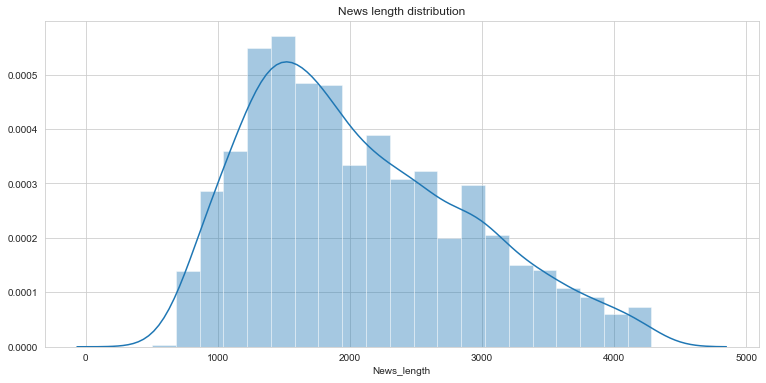

In [38]:
quantile_95 = df['News_length'].quantile(0.95)
df_95 = df[df['News_length'] < quantile_95]

plt.figure(figsize=(12.8,6))
sns.distplot(df_95['News_length']).set_title('News length distribution')

In [39]:
df_more10k_char = df[df['News_length'] > 10000]
len(df_more10k_char)

7

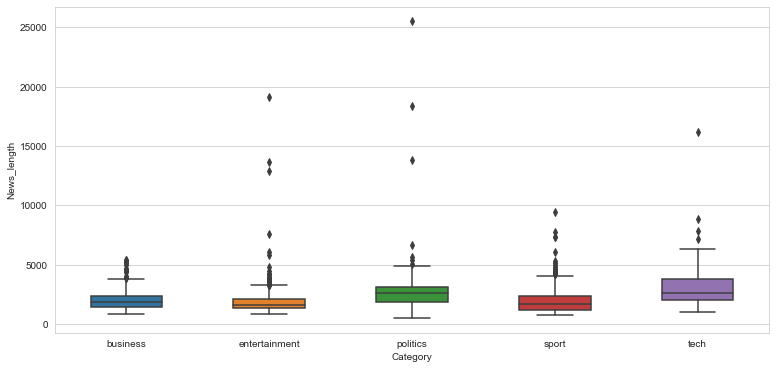

In [40]:
plt.figure(figsize=(12.8,6))
sns.boxplot(data=df, x='Category', y='News_length',width=.5)

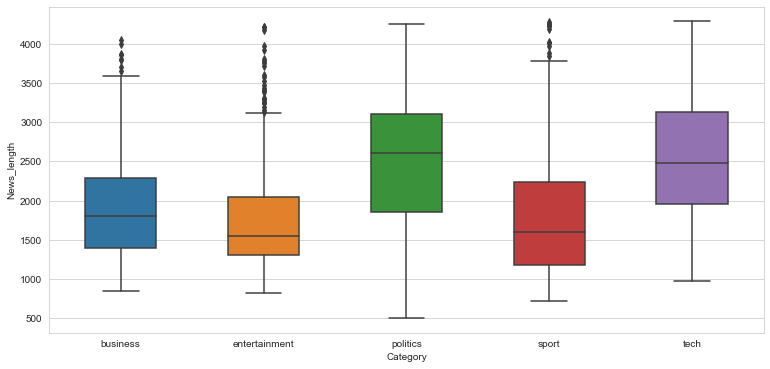

In [41]:
plt.figure(figsize=(12.8,6))
sns.boxplot(data=df_95, x='Category', y='News_length',width=.5)

In [45]:
with open('Desktop/News_dataset.pickle','wb') as output:
    pickle.dump(df,output)
output.close()